# Chapter 2 Single-parameter models

### Example. Estimation of prob of a female birth

- $\theta$: prob of female born.
- Binomial model: $p(y|\theta)=Bin(y|n,\theta)$
- prior of $\theta$: $U(0,1)$


posterior:

$$
p(y|\theta) \propto \theta^y (1-\theta)^{n-y}
$$

then this gives the beta distribution.

## Example: Probability of a girl birth given placenta previa

### Analysis using a non-conjugate prior distribution

- consider using prior density such as
  - 40% of prob mass is outside of \[0.385,0.585\]
  - "triangle" density




In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


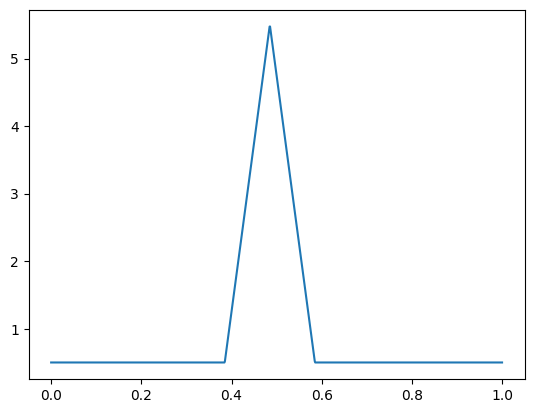

In [21]:
def triangle_prior(theta):
    if 0<= theta < 0.385:
        return 0.5
    elif 0.385 <= theta < 0.485:
        return theta * 50 - 18.75
    elif 0.485 <= theta < 0.585:
        return theta * -50 + 29.75
    elif 0.585 <= theta <= 1:
        return 0.5
    else:
        return 0

x = np.linspace(0,1,1000)
dens = np.vectorize(triangle_prior)
y = dens(x)
plt.plot(x,y)
plt.show()

Compute posterior using this prior

-> multiply prior density and binomial likelihood for each theta data points.

In [18]:
def likelihood(theta, n=980, k=437):
    from scipy.stats import binom
    return binom.pmf(k, n, theta)

def posterior(theta):
    return triangle_prior(theta) * likelihood(theta)


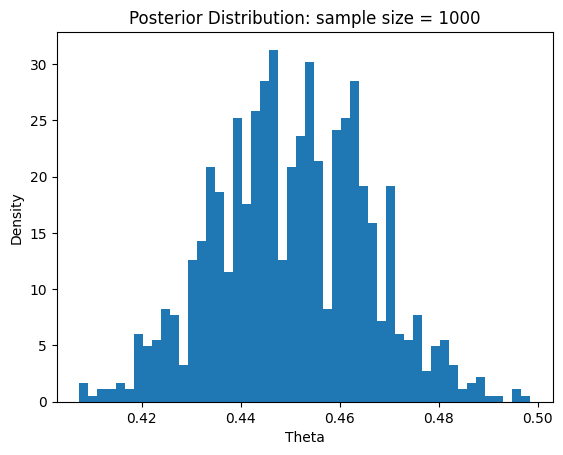

Posterior Median: 0.45
95% Credible Interval: (0.42, 0.481)


In [38]:
# Create samples for posterior

# create posterior distribution
theta_values = np.linspace(0,1,1000)
posterior_values = np.array([posterior(theta) for theta in theta_values])
posterior_values /= np.sum(posterior_values)

# sampling
n = 1000
samples = np.random.choice(theta_values, size=n, p=posterior_values)

plt.hist(samples, bins=50, density=True)
plt.title(f"Posterior Distribution: sample size = {n}")
plt.xlabel("Theta")
plt.ylabel("Density")
plt.show()

# posterior median
posterior_median = np.median(samples)

# calculate the 95% credible interval
lower_bound = np.percentile(samples, 2.5)
upper_bound = np.percentile(samples, 97.5)

print(f"Posterior Median: {posterior_median:.3}")
print(f"95% Credible Interval: ({lower_bound.item():.3}, {upper_bound.item():.3})")